# Unemployment Analysis in India

Libraries imported successfully!
Dataset 1 loaded successfully!
Shape: (768, 7)

📋 DATASET 1 - COLUMN NAMES:
['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']

Dataset 2 loaded successfully!
Shape: (267, 9)

📋 DATASET 2 - COLUMN NAMES:
['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']

### DATASET 1 - OVERVIEW ###

First 5 rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly              

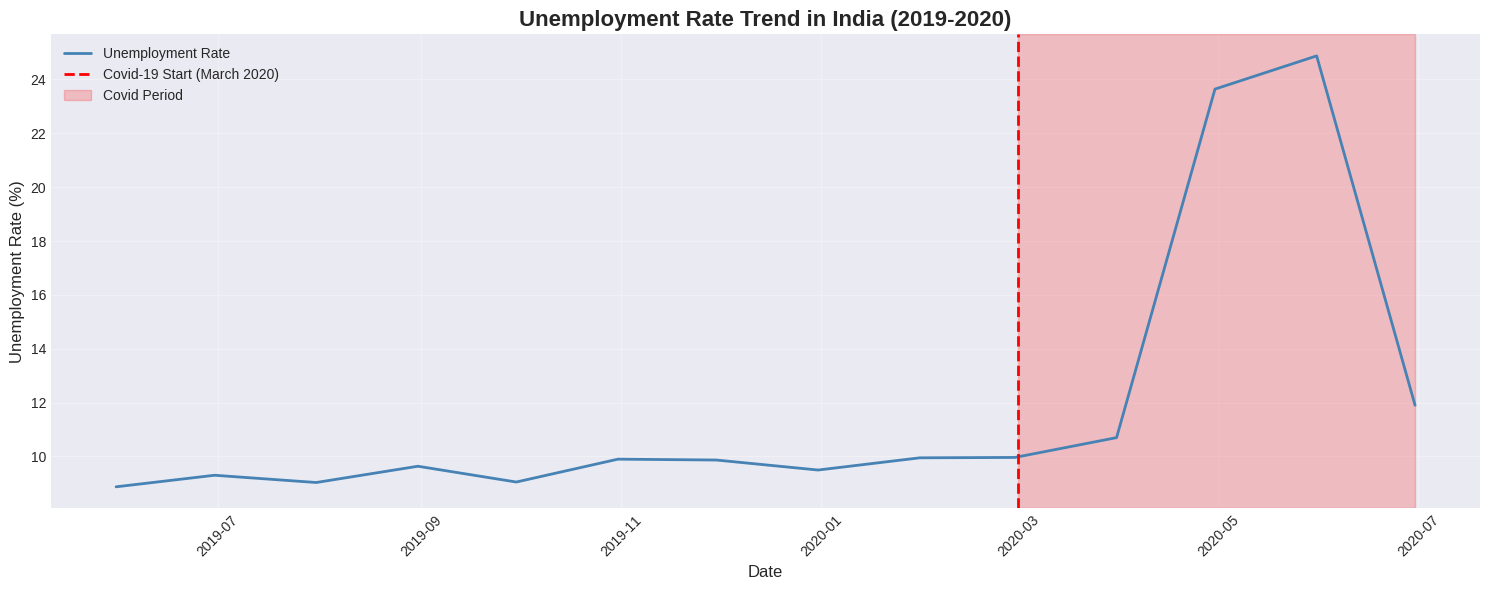

✓ Saved: covid_comparison_boxplot.png


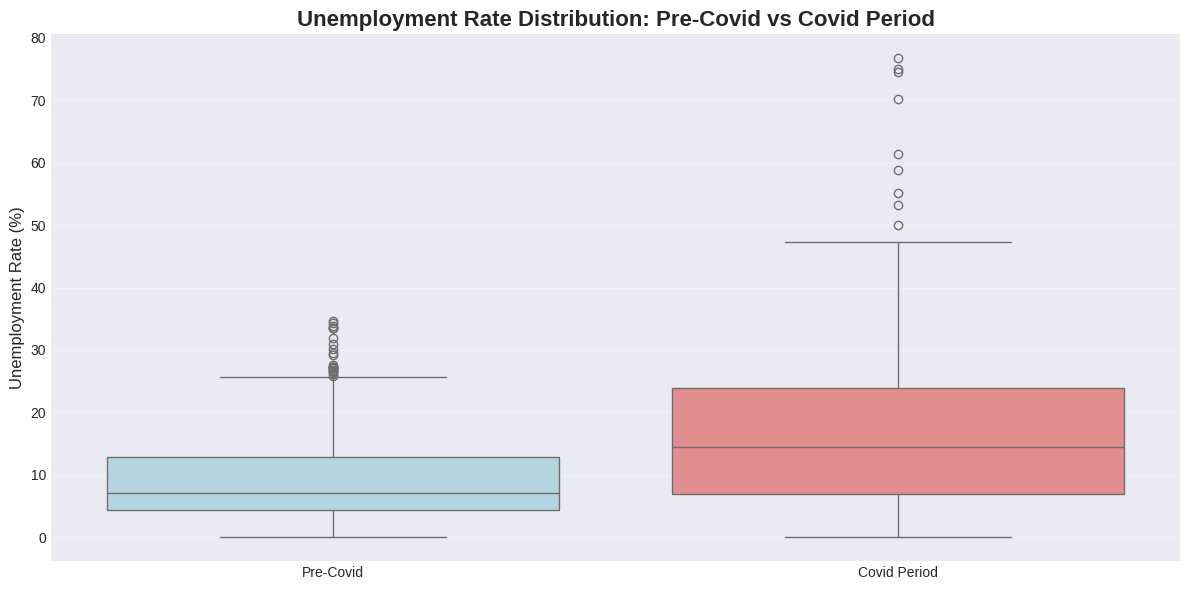

✓ Saved: top_regions_unemployment.png


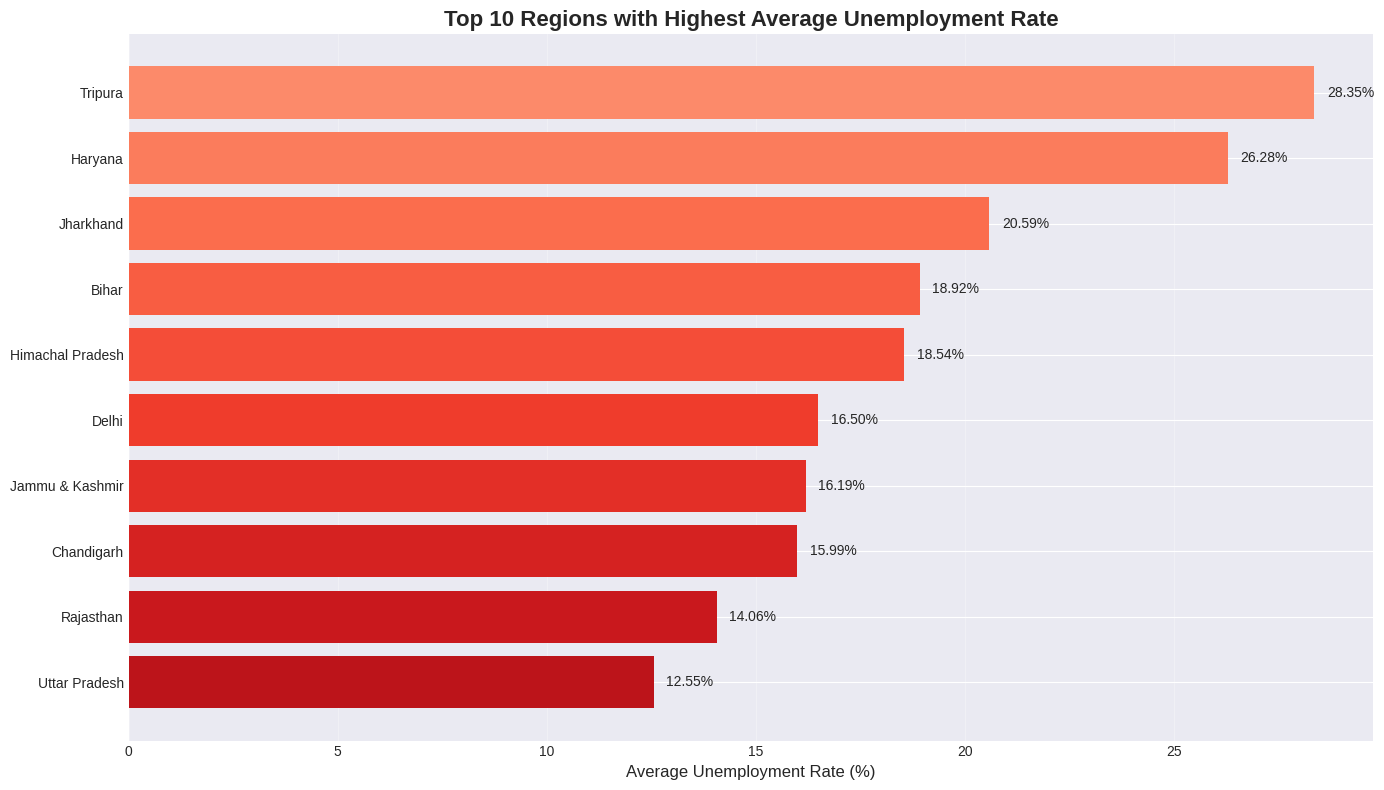

✓ Saved: urban_vs_rural_comparison.png


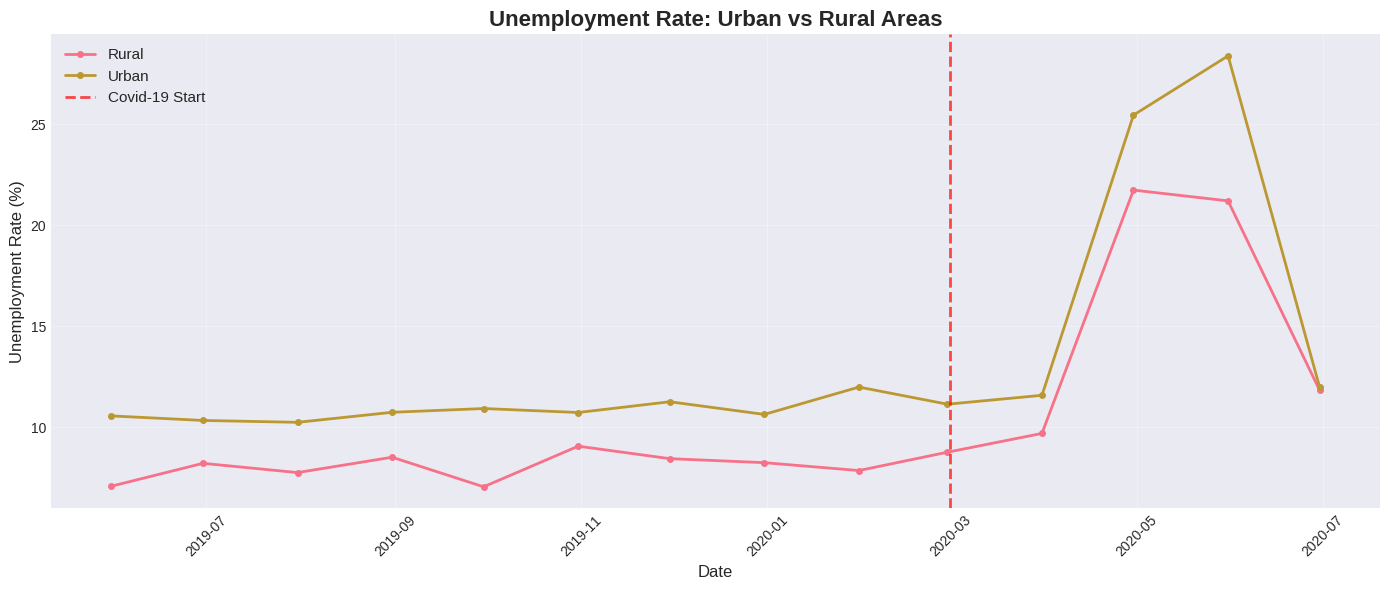

✓ Saved: seasonal_heatmap.png


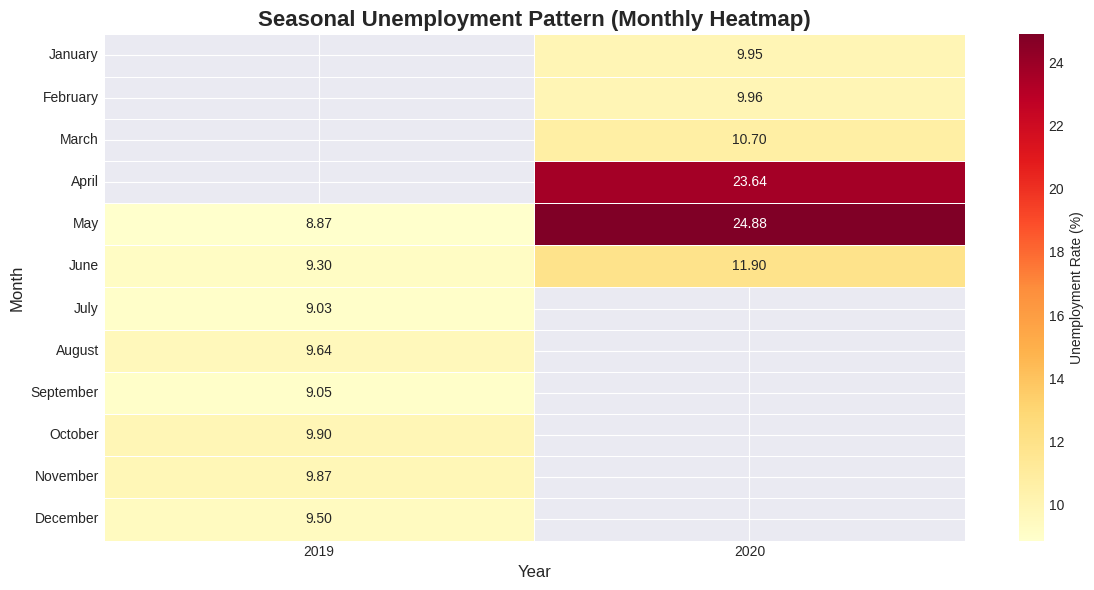

✓ Saved: quarterly_trends.png


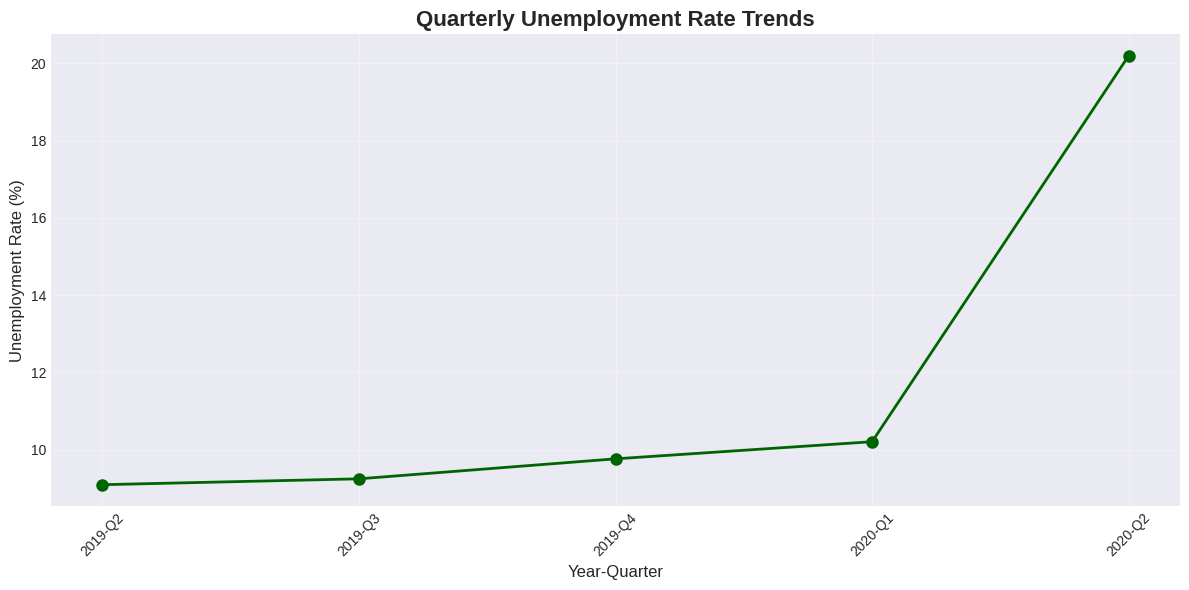

✓ Saved: unemployment_vs_participation.png


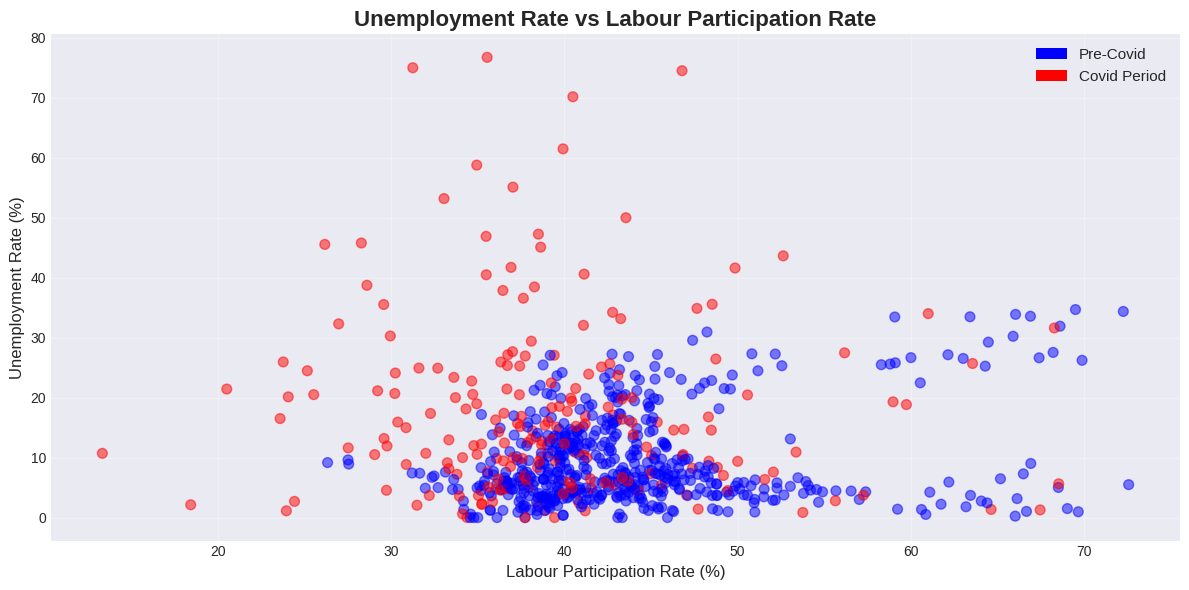


### STATISTICAL ANALYSIS: COVID-19 IMPACT ###
--------------------------------------------------------------------------------

T-test Results:
  T-statistic: -9.9757
  P-value: 0.000000
  Result: The difference is statistically significant (p < 0.05)

Percentage Change in Unemployment:
  Pre-Covid Average: 9.51%
  Covid Period Average: 17.77%
  Percentage Increase: 86.91%

### REGIONAL IMPACT DURING COVID-19 ###
--------------------------------------------------------------------------------

Top 10 Most Affected Regions (by absolute change):
        Region  Pre_Covid_Avg  Covid_Avg  Absolute_Change  Percentage_Change
    Puducherry         1.5930   38.95500         37.36200        2345.386064
    Tamil Nadu         2.8365   25.40375         22.56725         795.601974
     Jharkhand        14.2795   36.34875         22.06925         154.551980
         Bihar        13.8330   31.63125         17.79825         128.665149
     Karnataka         3.2345   15.28000         12.04550       

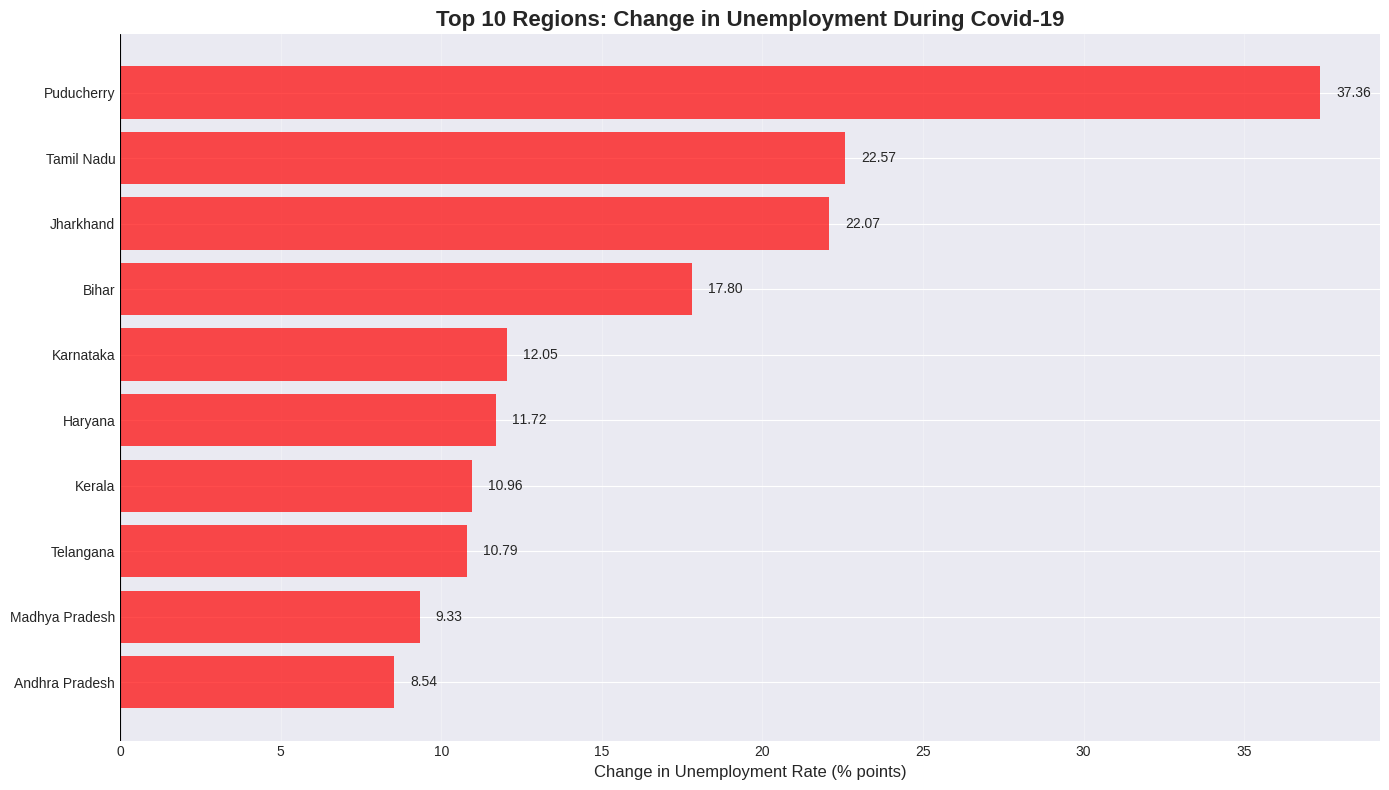


                    UNEMPLOYMENT ANALYSIS - KEY INSIGHTS

### 1. OVERALL TRENDS ###
   • Dataset covers: May 2019 to June 2020
   • Average unemployment rate: 11.79%
   • Highest unemployment recorded: 76.74%

### 2. COVID-19 IMPACT ###
   • Pre-Covid average: 9.51%
   • Covid period average: 17.77%
   • Increase: 82.82% (8.26 percentage points)
   • Statistical significance: YES (p < 0.05)

### 3. REGIONAL PATTERNS ###
   • Most affected region: Puducherry
     - Unemployment increased by: 37.36 percentage points
   • Highest average unemployment: Tripura (28.35%)
   • Lowest average unemployment: Meghalaya (4.80%)

### 4. URBAN vs RURAL ###
   • Urban unemployment average: 13.17%
   • Rural unemployment average: 10.32%
   • Difference: 2.84 percentage points

### 5. SEASONAL TRENDS ###
   • Highest unemployment month: April (23.64%)
   • Lowest unemployment month: July (9.03%)
   • Seasonal variation: 14.61 percentage points

### 6. POLICY RECOMMENDATIONS ###
   • Focus on regions w

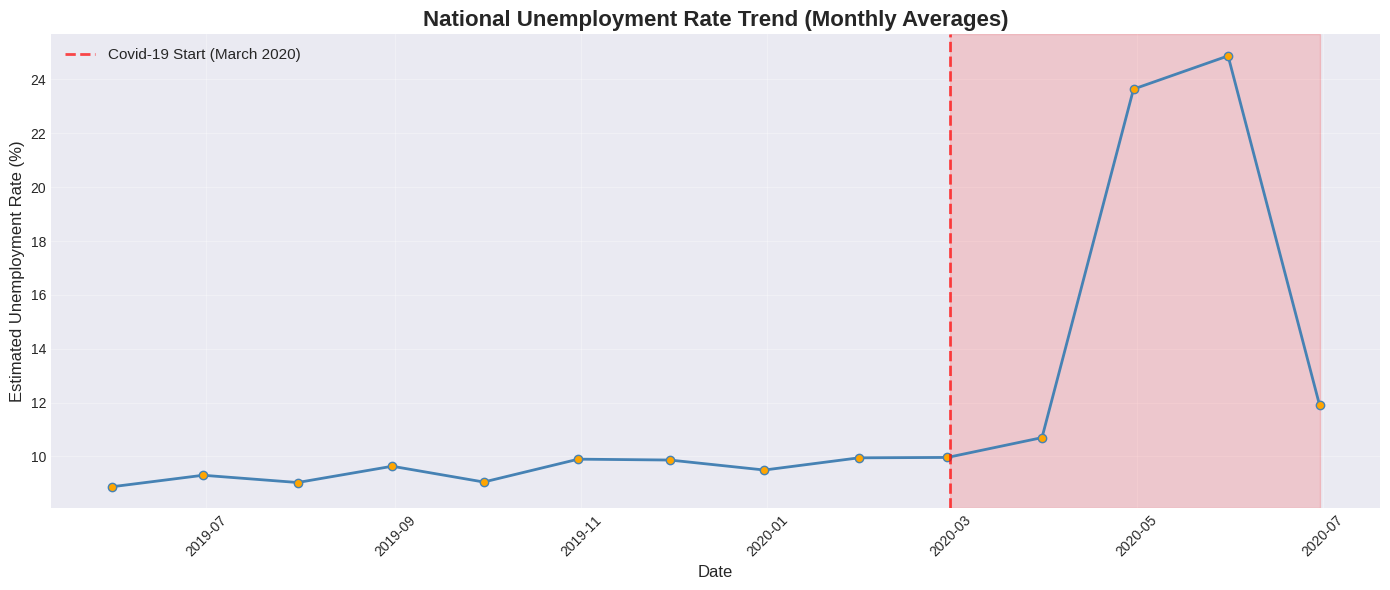

✓ Saved: monthly_seasonality_overall.png


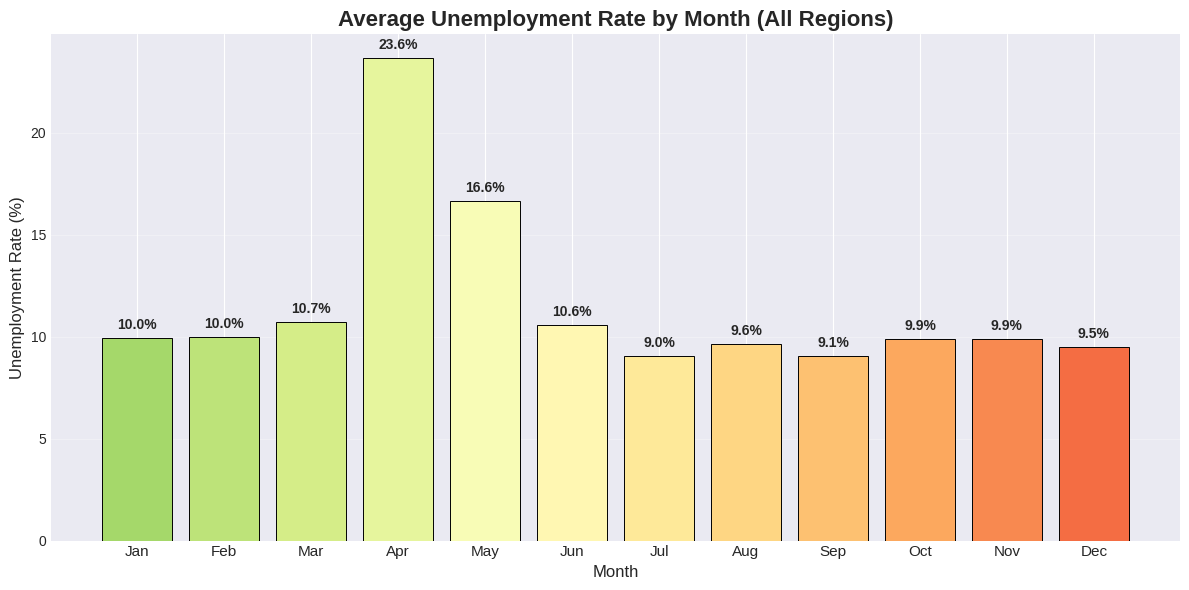

✓ Saved: region_month_heatmap.png


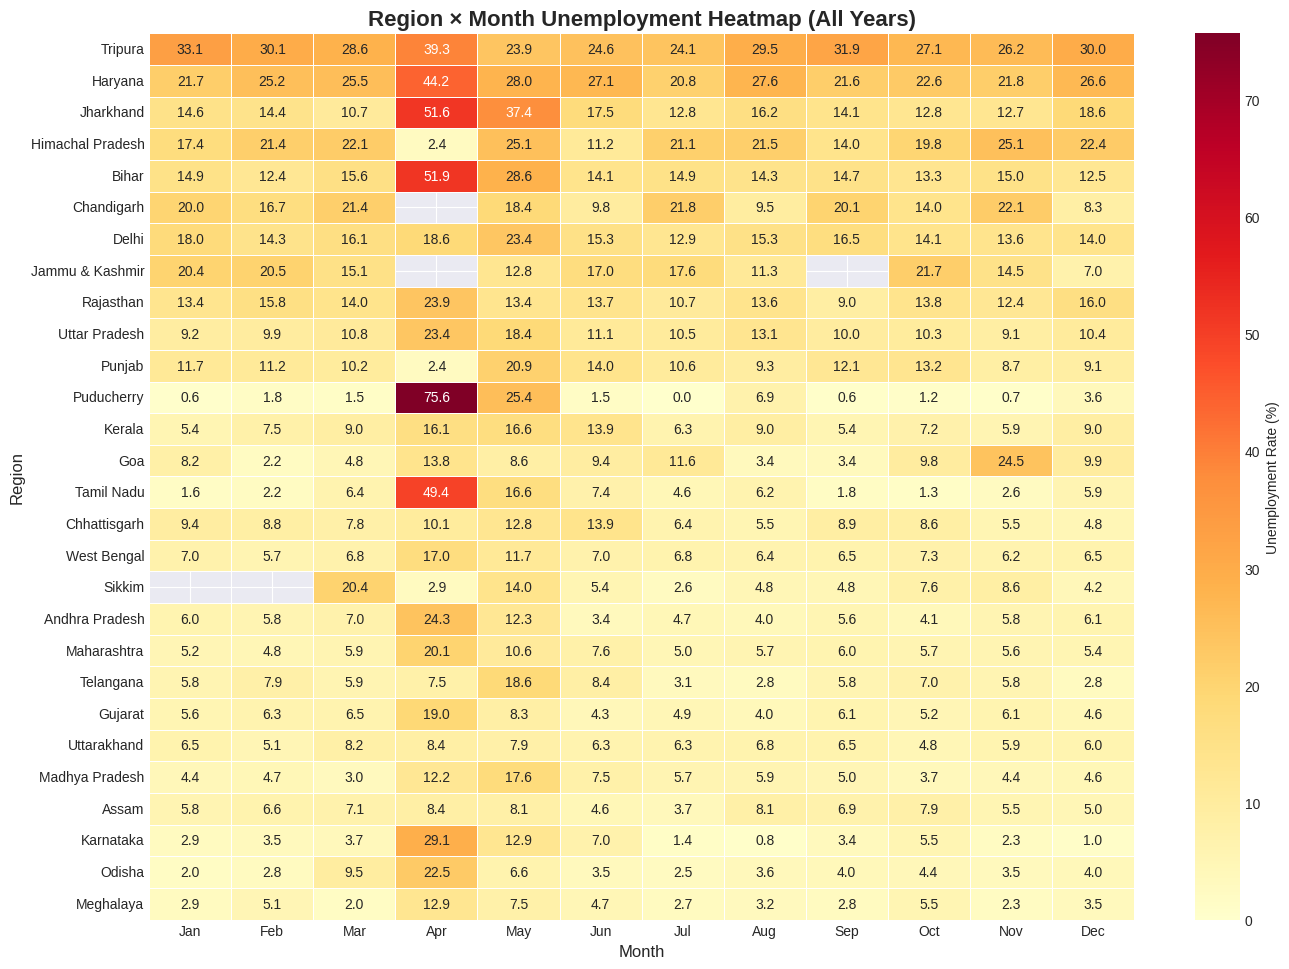

✓ Saved: region_month_heatmap_2020.png


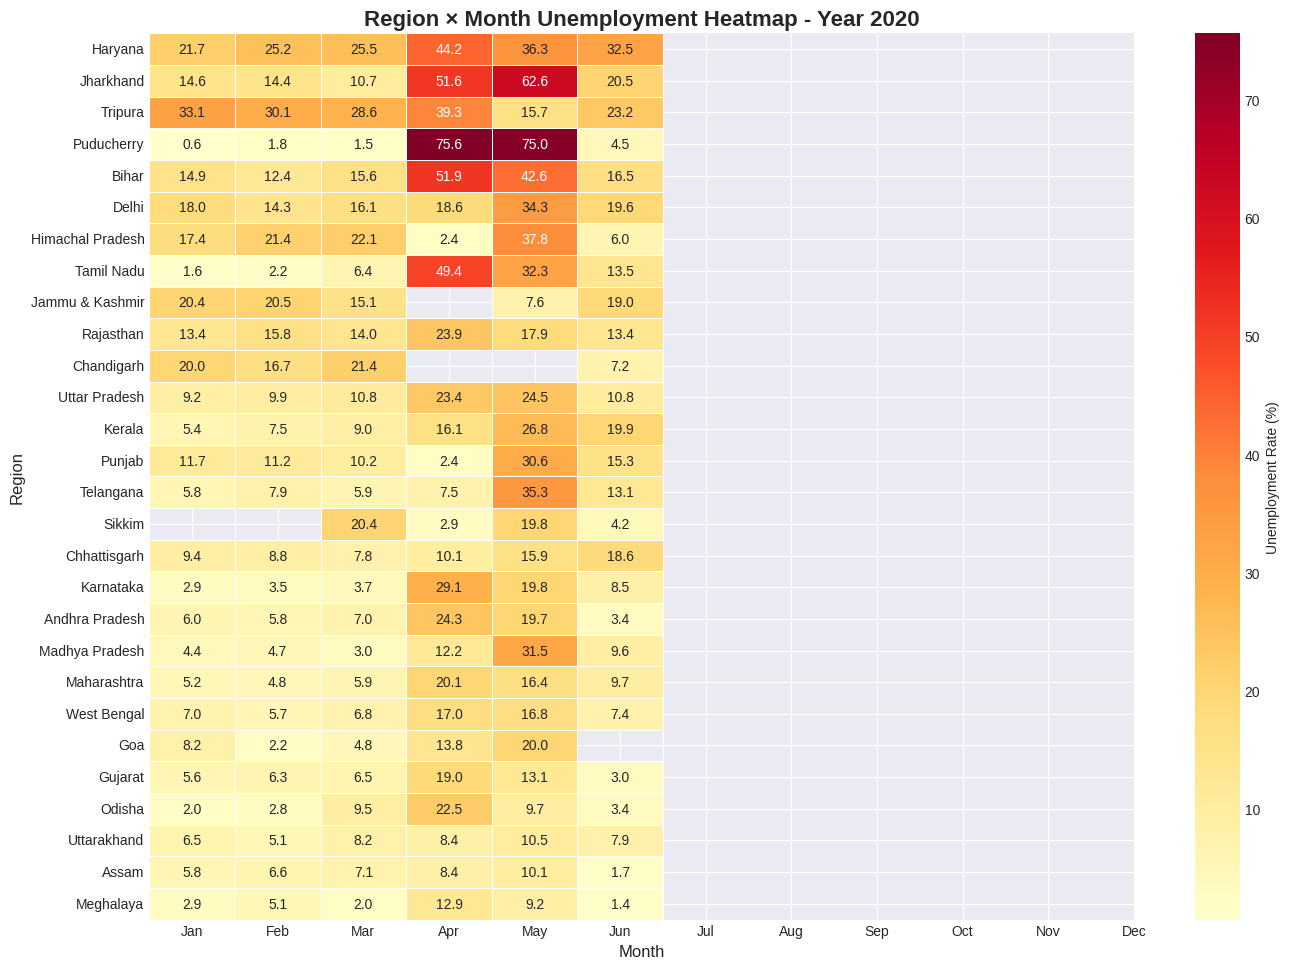


ℹ Also created a 2020-specific heatmap to show Covid impact by region and month

Analysis completed successfully!
Total visualizations created: 11-12
All charts have been saved as PNG files.

✓ Exported: regional_covid_impact_summary.csv
✓ Exported: monthly_unemployment_summary.csv
✓ Exported: area_wise_summary.csv

All analysis files exported successfully!


In [1]:
# ============================================================================
# STEP 1: Import Required Libraries
# ============================================================================
"""
Import all necessary libraries for data manipulation, analysis, and visualization.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print("="*80)


# ============================================================================
# STEP 2: Load the Datasets
# ============================================================================
"""
Load both CSV files into pandas DataFrames.
We'll handle any potential errors during loading.
"""

try:
    # Load first dataset
    df1 = pd.read_csv('Unemployment in India.csv')
    print("Dataset 1 loaded successfully!")
    print(f"Shape: {df1.shape}")

    # Display all column names to identify the correct names
    print("\n📋 DATASET 1 - COLUMN NAMES:")
    print(df1.columns.tolist())

    # Load second dataset
    df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
    print("\nDataset 2 loaded successfully!")
    print(f"Shape: {df2.shape}")

    print("\n📋 DATASET 2 - COLUMN NAMES:")
    print(df2.columns.tolist())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure the CSV files are in the correct directory.")
except Exception as e:
    print(f"Error loading data: {e}")

print("="*80)


# ============================================================================
# STEP 3: Initial Data Exploration
# ============================================================================
"""
Examine the structure, columns, and basic statistics of both datasets.
This helps us understand what we're working with.
"""

print("\n### DATASET 1 - OVERVIEW ###")
print("\nFirst 5 rows:")
print(df1.head())

print("\nColumn names and data types:")
print(df1.dtypes)

print("\nBasic statistics:")
print(df1.describe())

print("\nMissing values:")
print(df1.isnull().sum())

print("\n" + "="*80)

print("\n### DATASET 2 - OVERVIEW ###")
print("\nFirst 5 rows:")
print(df2.head())

print("\nColumn names and data types:")
print(df2.dtypes)

print("\nBasic statistics:")
print(df2.describe())

print("\nMissing values:")
print(df2.isnull().sum())

print("="*80)


# ============================================================================
# STEP 4: Data Cleaning
# ============================================================================
"""
Clean the data by:
- Removing leading/trailing spaces from column names
- Converting date columns to datetime format
- Handling missing values
- Removing duplicates
- Standardizing column names for consistency
"""

# Clean column names (remove extra spaces and handle special characters)
df1.columns = df1.columns.str.strip().str.replace('\xa0', ' ')
df2.columns = df2.columns.str.strip().str.replace('\xa0', ' ')

print("\n### DATA CLEANING ###")
print("\n✅ Cleaned column names:")
print("Dataset 1:", df1.columns.tolist())
print("Dataset 2:", df2.columns.tolist())

# Find the date column (it might have a slightly different name)
date_col_df1 = None
date_col_df2 = None

# Check for common date column names
possible_date_names = ['Date', 'date', 'DATE', ' Date', 'Date ', ' date', ' Date ']

for col in df1.columns:
    if 'date' in col.lower():
        date_col_df1 = col
        break

for col in df2.columns:
    if 'date' in col.lower():
        date_col_df2 = col
        break

if date_col_df1:
    print(f"\n✓ Found date column in Dataset 1: '{date_col_df1}'")
else:
    print("\n⚠ WARNING: Could not find date column in Dataset 1")
    print("Available columns:", df1.columns.tolist())

if date_col_df2:
    print(f"✓ Found date column in Dataset 2: '{date_col_df2}'")
else:
    print("⚠ WARNING: Could not find date column in Dataset 2")
    print("Available columns:", df2.columns.tolist())

# Rename to standard 'Date' if found with different name
if date_col_df1 and date_col_df1 != 'Date':
    df1.rename(columns={date_col_df1: 'Date'}, inplace=True)
    print(f"\n✓ Renamed '{date_col_df1}' to 'Date' in Dataset 1")

if date_col_df2 and date_col_df2 != 'Date':
    df2.rename(columns={date_col_df2: 'Date'}, inplace=True)
    print(f"✓ Renamed '{date_col_df2}' to 'Date' in Dataset 2")

# Check for duplicate column names in df2 (has 'Region' twice)
print("\n### Checking for duplicate columns ###")
print("\nDataset 2 column names:")
print(df2.columns.tolist())

# Handle duplicate columns
if len(df2.columns) != len(set(df2.columns)):
    print("\n⚠ Found duplicate columns in Dataset 2")
    # Get column names with their positions
    cols = pd.Series(df2.columns)

    # Find duplicates
    for dup in cols[cols.duplicated()].unique():
        print(f"  Duplicate column: '{dup}'")
        # Keep first occurrence, drop others
        cols_to_keep = [i for i, col in enumerate(df2.columns) if col != dup or i == df2.columns.tolist().index(dup)]
        df2 = df2.iloc[:, cols_to_keep]

    print("\n✓ Removed duplicate columns")
    print("Cleaned Dataset 2 columns:", df2.columns.tolist())

# Display first few rows with sample dates
print("\n### Sample Data ###")
if 'Date' in df1.columns:
    print("\nDataset 1 - First 5 rows:")
    print(df1[['Date', 'Region']].head() if 'Region' in df1.columns else df1.head())
    print("\nSample dates:", df1['Date'].head(5).tolist())

if 'Date' in df2.columns:
    print("\nDataset 2 - First 5 rows:")
    print(df2[['Date', 'Region']].head() if 'Region' in df2.columns else df2.head())
    print("\nSample dates:", df2['Date'].head(5).tolist())

# Convert Date columns to datetime - try multiple formats
def parse_dates(date_series):
    """Try multiple date formats to parse dates correctly"""
    if 'Date' not in date_series.name and date_series.name is not None:
        print(f"⚠ Warning: Expected 'Date' column, got '{date_series.name}'")
        return date_series

    # First try with dayfirst=True
    parsed = pd.to_datetime(date_series, dayfirst=True, errors='coerce')

    # If there are still NaT values, try other formats
    if parsed.isna().any():
        # Try format: DD-MM-YYYY
        mask = parsed.isna()
        parsed[mask] = pd.to_datetime(date_series[mask], format='%d-%m-%Y', errors='coerce')

    if parsed.isna().any():
        # Try format: DD/MM/YYYY
        mask = parsed.isna()
        parsed[mask] = pd.to_datetime(date_series[mask], format='%d/%m/%Y', errors='coerce')

    return parsed

print("\n### Converting Dates ###")

if 'Date' in df1.columns:
    df1['Date'] = parse_dates(df1['Date'])
    print(f"✓ Dataset 1 date conversion completed")
    print(f"  Date range: {df1['Date'].min()} to {df1['Date'].max()}")
    print(f"  Failed conversions: {df1['Date'].isna().sum()}")
else:
    print("⚠ Cannot convert dates - 'Date' column not found in Dataset 1")

if 'Date' in df2.columns:
    df2['Date'] = parse_dates(df2['Date'])
    print(f"✓ Dataset 2 date conversion completed")
    print(f"  Date range: {df2['Date'].min()} to {df2['Date'].max()}")
    print(f"  Failed conversions: {df2['Date'].isna().sum()}")
else:
    print("⚠ Cannot convert dates - 'Date' column not found in Dataset 2")

# Handle missing values
print("\n### Missing Values Analysis ###")
print("\nDataset 1 missing values:")
print(df1.isnull().sum())

print("\nDataset 2 missing values:")
print(df2.isnull().sum())

# Drop rows with missing critical values
df1_clean = df1.dropna(subset=['Date', 'Estimated Unemployment Rate (%)'])
df2_clean = df2.dropna(subset=['Date', 'Estimated Unemployment Rate (%)'])

print(f"\nDataset 1: Removed {len(df1) - len(df1_clean)} rows with missing values")
print(f"Dataset 2: Removed {len(df2) - len(df2_clean)} rows with missing values")

# Remove duplicates
df1_clean = df1_clean.drop_duplicates()
df2_clean = df2_clean.drop_duplicates()

print(f"\nDataset 1 after cleaning: {df1_clean.shape}")
print(f"Dataset 2 after cleaning: {df2_clean.shape}")

print("="*80)


# ============================================================================
# STEP 5: Feature Engineering
# ============================================================================
"""
Create new features from existing data:
- Extract year, month, quarter from dates
- Create Covid-19 period indicator
- Calculate rolling averages
"""

print("\n### FEATURE ENGINEERING ###")

# Extract temporal features for both datasets
for df in [df1_clean, df2_clean]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Month_Name'] = df['Date'].dt.strftime('%B')
    df['Quarter'] = df['Date'].dt.quarter

# Create Covid-19 period indicator (March 2020 onwards is considered Covid period)
covid_start_date = pd.to_datetime('2020-03-01')

df1_clean['Covid_Period'] = df1_clean['Date'] >= covid_start_date
df2_clean['Covid_Period'] = df2_clean['Date'] >= covid_start_date

print("\nNew features created:")
print("- Year, Month, Month_Name, Quarter")
print("- Covid_Period (March 2020 onwards)")

# Calculate 3-month rolling average for unemployment rate
df1_clean = df1_clean.sort_values(['Region', 'Date'])
df1_clean['Unemployment_MA3'] = df1_clean.groupby('Region')['Estimated Unemployment Rate (%)'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

print("\nRolling average (3-month) calculated for unemployment rate")
print("="*80)


# ============================================================================
# STEP 6: Exploratory Data Analysis (EDA)
# ============================================================================
"""
Perform detailed analysis to understand:
- Overall unemployment trends
- Regional variations
- Temporal patterns
- Impact of Covid-19
"""

print("\n### EXPLORATORY DATA ANALYSIS ###")

# Overall statistics
print("\n1. OVERALL UNEMPLOYMENT STATISTICS")
print("-" * 50)
print(f"Average Unemployment Rate: {df1_clean['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"Median Unemployment Rate: {df1_clean['Estimated Unemployment Rate (%)'].median():.2f}%")
print(f"Std Dev: {df1_clean['Estimated Unemployment Rate (%)'].std():.2f}%")
print(f"Max Unemployment Rate: {df1_clean['Estimated Unemployment Rate (%)'].max():.2f}%")
print(f"Min Unemployment Rate: {df1_clean['Estimated Unemployment Rate (%)'].min():.2f}%")

# Pre-Covid vs Covid comparison
print("\n2. PRE-COVID vs COVID PERIOD COMPARISON")
print("-" * 50)

pre_covid = df1_clean[~df1_clean['Covid_Period']]
covid = df1_clean[df1_clean['Covid_Period']]

print(f"\nPre-Covid Period:")
print(f"  Average Unemployment Rate: {pre_covid['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"  Median Unemployment Rate: {pre_covid['Estimated Unemployment Rate (%)'].median():.2f}%")

print(f"\nCovid Period (March 2020 onwards):")
print(f"  Average Unemployment Rate: {covid['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"  Median Unemployment Rate: {covid['Estimated Unemployment Rate (%)'].median():.2f}%")

print(f"\nIncrease in unemployment: {covid['Estimated Unemployment Rate (%)'].mean() - pre_covid['Estimated Unemployment Rate (%)'].mean():.2f} percentage points")

# Regional analysis
print("\n3. TOP 10 REGIONS WITH HIGHEST AVERAGE UNEMPLOYMENT")
print("-" * 50)
regional_avg = df1_clean.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print(regional_avg.head(10))

# Area-wise analysis (Urban vs Rural)
print("\n4. AREA-WISE ANALYSIS (Urban vs Rural)")
print("-" * 50)
area_stats = df1_clean.groupby('Area')['Estimated Unemployment Rate (%)'].agg(['mean', 'median', 'std'])
print(area_stats)

# Monthly trends
print("\n5. MONTHLY UNEMPLOYMENT TRENDS")
print("-" * 50)
monthly_avg = df1_clean.groupby('Month_Name')['Estimated Unemployment Rate (%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
print(monthly_avg)

print("="*80)


# ============================================================================
# STEP 7: Visualization - Time Series Analysis
# ============================================================================
"""
Create visualizations to show unemployment trends over time.
"""

print("\n### CREATING VISUALIZATIONS ###")

# Figure 1: Overall unemployment trend over time
plt.figure(figsize=(15, 6))

monthly_data = df1_clean.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Remove any rows with NaT dates before plotting
monthly_data = monthly_data.dropna(subset=['Date'])

if len(monthly_data) > 0:
    plt.plot(monthly_data['Date'], monthly_data['Estimated Unemployment Rate (%)'],
             linewidth=2, color='steelblue', label='Unemployment Rate')

    # Add Covid-19 marker only if we have data in that range
    if monthly_data['Date'].max() >= covid_start_date:
        plt.axvline(x=covid_start_date, color='red', linestyle='--', linewidth=2,
                    label='Covid-19 Start (March 2020)')

        # Shading for Covid period
        plt.axvspan(covid_start_date, monthly_data['Date'].max(), alpha=0.2, color='red',
                    label='Covid Period')

    plt.title('Unemployment Rate Trend in India (2019-2020)', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Unemployment Rate (%)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('unemployment_trend_timeline.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: unemployment_trend_timeline.png")
    plt.show()
else:
    print("⚠ Warning: No valid date data available for timeline plot")


# Figure 2: Pre-Covid vs Covid comparison (Box plots)
plt.figure(figsize=(12, 6))

df1_clean['Period'] = df1_clean['Covid_Period'].map({True: 'Covid Period', False: 'Pre-Covid'})

sns.boxplot(data=df1_clean, x='Period', y='Estimated Unemployment Rate (%)',
            palette=['lightblue', 'lightcoral'])
plt.title('Unemployment Rate Distribution: Pre-Covid vs Covid Period',
          fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xlabel('')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('covid_comparison_boxplot.png', dpi=300, bbox_inches='tight')
print("✓ Saved: covid_comparison_boxplot.png")
plt.show()


# ============================================================================
# STEP 8: Regional Analysis Visualizations
# ============================================================================
"""
Analyze and visualize regional differences in unemployment.
"""

# Figure 3: Top 10 states with highest unemployment
plt.figure(figsize=(14, 8))

top_regions = df1_clean.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(top_regions)))
bars = plt.barh(range(len(top_regions)), top_regions.values, color=colors)

plt.yticks(range(len(top_regions)), top_regions.index)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Top 10 Regions with Highest Average Unemployment Rate', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_regions.values)):
    plt.text(value + 0.3, i, f'{value:.2f}%', va='center', fontsize=10)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('top_regions_unemployment.png', dpi=300, bbox_inches='tight')
print("✓ Saved: top_regions_unemployment.png")
plt.show()


# Figure 4: Urban vs Rural unemployment comparison
plt.figure(figsize=(14, 6))

area_comparison = df1_clean.groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Remove NaT dates
area_comparison = area_comparison.dropna(subset=['Date'])

if len(area_comparison) > 0:
    for area in area_comparison['Area'].unique():
        data = area_comparison[area_comparison['Area'] == area]
        if len(data) > 0:
            plt.plot(data['Date'], data['Estimated Unemployment Rate (%)'],
                     linewidth=2, label=area, marker='o', markersize=4)

    # Add Covid marker if data range includes it
    if area_comparison['Date'].max() >= covid_start_date:
        plt.axvline(x=covid_start_date, color='red', linestyle='--', linewidth=2,
                    label='Covid-19 Start', alpha=0.7)

    plt.title('Unemployment Rate: Urban vs Rural Areas', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Unemployment Rate (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('urban_vs_rural_comparison.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: urban_vs_rural_comparison.png")
    plt.show()
else:
    print("⚠ Warning: No valid data for urban vs rural comparison")


# ============================================================================
# STEP 9: Seasonal and Temporal Pattern Analysis
# ============================================================================
"""
Identify seasonal trends and patterns in unemployment data.
"""

# Figure 5: Monthly seasonal pattern (heatmap)
plt.figure(figsize=(12, 6))

# Create pivot table for heatmap
monthly_pivot = df1_clean.pivot_table(
    values='Estimated Unemployment Rate (%)',
    index='Month_Name',
    columns='Year',
    aggfunc='mean'
)

# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pivot = monthly_pivot.reindex([m for m in month_order if m in monthly_pivot.index])

sns.heatmap(monthly_pivot, annot=True, fmt='.2f', cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title('Seasonal Unemployment Pattern (Monthly Heatmap)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.savefig('seasonal_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: seasonal_heatmap.png")
plt.show()


# Figure 6: Quarterly trends
plt.figure(figsize=(12, 6))

quarterly_data = df1_clean.groupby(['Year', 'Quarter'])['Estimated Unemployment Rate (%)'].mean().reset_index()
quarterly_data['Year_Quarter'] = quarterly_data['Year'].astype(str) + '-Q' + quarterly_data['Quarter'].astype(str)

plt.plot(quarterly_data['Year_Quarter'], quarterly_data['Estimated Unemployment Rate (%)'],
         marker='o', linewidth=2, markersize=8, color='darkgreen')

plt.title('Quarterly Unemployment Rate Trends', fontsize=16, fontweight='bold')
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('quarterly_trends.png', dpi=300, bbox_inches='tight')
print("✓ Saved: quarterly_trends.png")
plt.show()


# ============================================================================
# STEP 10: Labour Participation Rate Analysis
# ============================================================================
"""
Analyze the relationship between unemployment and labour participation.
"""

# Figure 7: Unemployment vs Labour Participation Rate
plt.figure(figsize=(12, 6))

plt.scatter(df1_clean['Estimated Labour Participation Rate (%)'],
           df1_clean['Estimated Unemployment Rate (%)'],
           alpha=0.5, c=df1_clean['Covid_Period'].map({True: 'red', False: 'blue'}),
           s=50)

plt.xlabel('Labour Participation Rate (%)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate vs Labour Participation Rate', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Pre-Covid'),
                  Patch(facecolor='red', label='Covid Period')]
plt.legend(handles=legend_elements, fontsize=11)

plt.tight_layout()
plt.savefig('unemployment_vs_participation.png', dpi=300, bbox_inches='tight')
print("✓ Saved: unemployment_vs_participation.png")
plt.show()


# ============================================================================
# STEP 11: Statistical Analysis - Covid Impact
# ============================================================================
"""
Perform statistical tests to quantify Covid-19 impact.
"""

print("\n### STATISTICAL ANALYSIS: COVID-19 IMPACT ###")
print("-" * 80)

from scipy import stats

pre_covid_rates = df1_clean[~df1_clean['Covid_Period']]['Estimated Unemployment Rate (%)']
covid_rates = df1_clean[df1_clean['Covid_Period']]['Estimated Unemployment Rate (%)']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(pre_covid_rates, covid_rates)

print(f"\nT-test Results:")
print(f"  T-statistic: {t_statistic:.4f}")
print(f"  P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"  Result: The difference is statistically significant (p < 0.05)")
else:
    print(f"  Result: The difference is NOT statistically significant (p >= 0.05)")

# Calculate percentage change
pct_change = ((covid_rates.mean() - pre_covid_rates.mean()) / pre_covid_rates.mean()) * 100

print(f"\nPercentage Change in Unemployment:")
print(f"  Pre-Covid Average: {pre_covid_rates.mean():.2f}%")
print(f"  Covid Period Average: {covid_rates.mean():.2f}%")
print(f"  Percentage Increase: {pct_change:.2f}%")

print("="*80)


# ============================================================================
# STEP 12: Regional Impact Analysis During Covid
# ============================================================================
"""
Identify which regions were most affected by Covid-19.
"""

print("\n### REGIONAL IMPACT DURING COVID-19 ###")
print("-" * 80)

# Calculate change in unemployment for each region
regional_impact = []

for region in df1_clean['Region'].unique():
    region_data = df1_clean[df1_clean['Region'] == region]

    pre_covid_avg = region_data[~region_data['Covid_Period']]['Estimated Unemployment Rate (%)'].mean()
    covid_avg = region_data[region_data['Covid_Period']]['Estimated Unemployment Rate (%)'].mean()

    if pd.notna(pre_covid_avg) and pd.notna(covid_avg):
        change = covid_avg - pre_covid_avg
        pct_change = (change / pre_covid_avg) * 100 if pre_covid_avg > 0 else 0

        regional_impact.append({
            'Region': region,
            'Pre_Covid_Avg': pre_covid_avg,
            'Covid_Avg': covid_avg,
            'Absolute_Change': change,
            'Percentage_Change': pct_change
        })

regional_impact_df = pd.DataFrame(regional_impact)
regional_impact_df = regional_impact_df.sort_values('Absolute_Change', ascending=False)

print("\nTop 10 Most Affected Regions (by absolute change):")
print(regional_impact_df.head(10).to_string(index=False))

print("\n" + "="*80)

# Figure 8: Regional Covid impact
plt.figure(figsize=(14, 8))

top_impact = regional_impact_df.head(10)

colors = ['red' if x > 0 else 'green' for x in top_impact['Absolute_Change']]
bars = plt.barh(range(len(top_impact)), top_impact['Absolute_Change'], color=colors, alpha=0.7)

plt.yticks(range(len(top_impact)), top_impact['Region'])
plt.xlabel('Change in Unemployment Rate (% points)', fontsize=12)
plt.title('Top 10 Regions: Change in Unemployment During Covid-19',
          fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_impact['Absolute_Change'])):
    plt.text(value + 0.5, i, f'{value:.2f}', va='center', fontsize=10)

plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('regional_covid_impact.png', dpi=300, bbox_inches='tight')
print("✓ Saved: regional_covid_impact.png")
plt.show()


# ============================================================================
# STEP 13: Key Insights and Summary Report
# ============================================================================
"""
Compile all findings into a comprehensive summary report.
"""

print("\n" + "="*80)
print(" " * 20 + "UNEMPLOYMENT ANALYSIS - KEY INSIGHTS")
print("="*80)

# Get date column (handle both 'Date' and 'date')
date_col = 'Date' if 'Date' in df1_clean.columns else 'date'
unemp_col = 'Estimated Unemployment Rate (%)' if 'Estimated Unemployment Rate (%)' in df1_clean.columns else 'u_rate'

print("\n### 1. OVERALL TRENDS ###")
if date_col in df1_clean.columns:
    print(f"   • Dataset covers: {df1_clean[date_col].min().strftime('%B %Y')} to {df1_clean[date_col].max().strftime('%B %Y')}")
print(f"   • Average unemployment rate: {df1_clean[unemp_col].mean():.2f}%")
print(f"   • Highest unemployment recorded: {df1_clean[unemp_col].max():.2f}%")

print("\n### 2. COVID-19 IMPACT ###")
print(f"   • Pre-Covid average: {pre_covid_rates.mean():.2f}%")
print(f"   • Covid period average: {covid_rates.mean():.2f}%")
print(f"   • Increase: {pct_change:.2f}% ({covid_rates.mean() - pre_covid_rates.mean():.2f} percentage points)")
print(f"   • Statistical significance: {'YES (p < 0.05)' if p_value < 0.05 else 'NO (p >= 0.05)'}")

print("\n### 3. REGIONAL PATTERNS ###")
print(f"   • Most affected region: {regional_impact_df.iloc[0]['Region']}")
print(f"     - Unemployment increased by: {regional_impact_df.iloc[0]['Absolute_Change']:.2f} percentage points")
print(f"   • Highest average unemployment: {regional_avg.index[0]} ({regional_avg.iloc[0]:.2f}%)")
print(f"   • Lowest average unemployment: {regional_avg.index[-1]} ({regional_avg.iloc[-1]:.2f}%)")

print("\n### 4. URBAN vs RURAL ###")
urban_avg = df1_clean[df1_clean['Area'] == 'Urban']['Estimated Unemployment Rate (%)'].mean()
rural_avg = df1_clean[df1_clean['Area'] == 'Rural']['Estimated Unemployment Rate (%)'].mean()
print(f"   • Urban unemployment average: {urban_avg:.2f}%")
print(f"   • Rural unemployment average: {rural_avg:.2f}%")
print(f"   • Difference: {abs(urban_avg - rural_avg):.2f} percentage points")

print("\n### 5. SEASONAL TRENDS ###")
highest_month = monthly_avg.idxmax()
lowest_month = monthly_avg.idxmin()
print(f"   • Highest unemployment month: {highest_month} ({monthly_avg[highest_month]:.2f}%)")
print(f"   • Lowest unemployment month: {lowest_month} ({monthly_avg[lowest_month]:.2f}%)")
print(f"   • Seasonal variation: {monthly_avg.max() - monthly_avg.min():.2f} percentage points")

print("\n### 6. POLICY RECOMMENDATIONS ###")
print("   • Focus on regions with highest Covid impact for targeted interventions")
print("   • Address urban-rural disparities in employment opportunities")
print("   • Prepare seasonal employment programs during high-unemployment months")
print("   • Strengthen social safety nets for vulnerable populations")
print("   • Invest in skill development and job creation programs")

print("\n" + "="*80)


# ============================================================================
# STEP 15: Additional Advanced Visualizations
# ============================================================================
"""
Create additional plots for deeper insights:
- National-level unemployment trend
- Monthly seasonality patterns
- Region x Month heatmap
"""

print("\n### ADDITIONAL ADVANCED VISUALIZATIONS ###")
print("-" * 80)

# Prepare combined dataset with standardized column names
combined = df1_clean.copy()
combined = combined.rename(columns={
    'Estimated Unemployment Rate (%)': 'u_rate',
    'Date': 'date',
    'Region': 'region'
})

# Ensure lowercase column names for consistency
combined.columns = combined.columns.str.lower()


# Function 1: National-level unemployment trend
def plot_overall_unemployment(df, savepath=None):
    """Plot national-level unemployment trend over time.
    If 'region' column exists, compute average across regions or filter for 'India'."""
    plt.figure(figsize=(14, 6))

    if 'region' in df.columns:
        # Try to find rows representing entire country
        candidates = df[df['region'].str.contains('India', case=False, na=False)]
        if len(candidates) > 0:
            ts = candidates.set_index('date').sort_index()['u_rate'].resample('M').mean()
        else:
            # Fall back to mean across regions for each month
            ts = df.set_index('date').groupby(pd.Grouper(freq='M'))['u_rate'].mean()
    else:
        ts = df.set_index('date').sort_index()['u_rate'].resample('M').mean()

    plt.plot(ts.index, ts.values, marker='o', linewidth=2, markersize=6,
             color='steelblue', markerfacecolor='orange', markeredgecolor='steelblue')

    # Add Covid-19 marker
    if ts.index.max() >= covid_start_date:
        plt.axvline(x=covid_start_date, color='red', linestyle='--',
                    linewidth=2, label='Covid-19 Start (March 2020)', alpha=0.7)
        plt.axvspan(covid_start_date, ts.index.max(), alpha=0.15, color='red')

    plt.title('National Unemployment Rate Trend (Monthly Averages)',
              fontsize=16, fontweight='bold')
    plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=11)
    plt.xticks(rotation=45)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {savepath}")
    plt.show()


# Function 2: Monthly seasonality pattern
def monthly_seasonality(df, region=None, savepath=None):
    """Plot average unemployment rate by month to see seasonality."""
    temp = df.copy()
    if region:
        temp = temp[temp['region'] == region]

    temp['month'] = temp['date'].dt.month
    month_avg = temp.groupby('month')['u_rate'].mean()

    plt.figure(figsize=(12, 6))

    colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, 12))
    bars = plt.bar(range(1, 13), month_avg.reindex(range(1, 13)).values,
                   color=colors, edgecolor='black', linewidth=0.7)

    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, month_avg.reindex(range(1, 13)).values)):
        if pd.notna(value):
            plt.text(bar.get_x() + bar.get_width()/2, value + 0.3,
                    f'{value:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(range(1, 13), month_names, fontsize=11)
    plt.title(f'Average Unemployment Rate by Month{(" - "+region) if region else " (All Regions)"}',
              fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Unemployment Rate (%)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {savepath}")
    plt.show()


# Function 3: Region x Month heatmap
def region_heatmap(df, year=None, savepath=None):
    """Create a heatmap: rows=region, cols=month, values=average unemployment in that month-year.
       If year is None, aggregate across years (seasonal heatmap)."""
    temp = df.copy()
    temp['month'] = temp['date'].dt.month

    if year:
        temp = temp[temp['date'].dt.year == year]
        title_suffix = f" - Year {year}"
    else:
        title_suffix = " (All Years)"

    pivot = temp.pivot_table(index='region', columns='month', values='u_rate', aggfunc='mean')

    # Sort by average unemployment (highest to lowest)
    pivot['avg'] = pivot.mean(axis=1)
    pivot = pivot.sort_values('avg', ascending=False).drop('avg', axis=1)

    plt.figure(figsize=(14, max(8, 0.35*len(pivot))))

    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd',
                linewidths=0.5, cbar_kws={'label': 'Unemployment Rate (%)'})

    plt.title(f'Region × Month Unemployment Heatmap{title_suffix}',
              fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Region', fontsize=12)

    # Set month labels
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(np.arange(12) + 0.5, month_names, rotation=0)

    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {savepath}")
    plt.show()


# Generate the additional plots
print("\nGenerating advanced visualizations...")
print("-" * 80)

# Plot 1: Overall national unemployment trend
plot_overall_unemployment(combined, savepath='overall_unemployment_trend.png')

# Plot 2: Monthly seasonality (overall)
monthly_seasonality(combined, savepath='monthly_seasonality_overall.png')

# Plot 3: Region x Month heatmap (seasonal by region)
region_heatmap(combined, year=None, savepath='region_month_heatmap.png')

# Plot 4: Region x Month heatmap for 2020 specifically (Covid year)
if 2020 in combined['date'].dt.year.unique():
    region_heatmap(combined, year=2020, savepath='region_month_heatmap_2020.png')
    print("\nℹ Also created a 2020-specific heatmap to show Covid impact by region and month")

print("\n" + "="*80)
print("Analysis completed successfully!")
print(f"Total visualizations created: 11-12")
print("All charts have been saved as PNG files.")
print("="*80)


# ============================================================================
# STEP 14: Export Summary Statistics
# ============================================================================
"""
Save key statistics to CSV files for further use.
"""

# Export regional impact summary
regional_impact_df.to_csv('regional_covid_impact_summary.csv', index=False)
print("\n✓ Exported: regional_covid_impact_summary.csv")

# Export monthly trends
monthly_summary = df1_clean.groupby(['Year', 'Month_Name']).agg({
    'Estimated Unemployment Rate (%)': ['mean', 'median', 'std'],
    'Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()
monthly_summary.to_csv('monthly_unemployment_summary.csv', index=False)
print("✓ Exported: monthly_unemployment_summary.csv")

# Export area-wise summary
area_summary = df1_clean.groupby(['Area', 'Covid_Period']).agg({
    'Estimated Unemployment Rate (%)': ['mean', 'median', 'std'],
    'Estimated Employed': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()
area_summary.to_csv('area_wise_summary.csv', index=False)
print("✓ Exported: area_wise_summary.csv")

print("\n" + "="*80)
print("All analysis files exported successfully!")
print("="*80)